In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.api.types import CategoricalDtype
from matplotlib.dates import DateFormatter

DURATION_AXIS_LABEL = 'average duration per ride (minutes)'
TOTAL_AXIS_LABEL = 'number of rides (thousands)'

def axis_label(x = '', y = ''):
    plt.xlabel(x)
    plt.ylabel(y)


In [7]:
merged = pd.DataFrame()

def difftime(end,start):
    return (end-start)/np.timedelta64(1,'m')

files = ["202108-divvy-tripdata.csv", "202109-divvy-tripdata.csv", "202110-divvy-tripdata.csv", 
    "202111-divvy-tripdata.csv", "202112-divvy-tripdata.csv", "202201-divvy-tripdata.csv",
     "202202-divvy-tripdata.csv", "202203-divvy-tripdata.csv", "202204-divvy-tripdata.csv",
      "202205-divvy-tripdata.csv", "202206-divvy-tripdata.csv", "202207-divvy-tripdata.csv"]

for f in files:
    temp = pd.read_csv(f, parse_dates=['started_at', 'ended_at'])
    temp = temp.drop(columns = ['ride_id']).drop(temp.loc[:, 'start_station_name':'end_lng'].columns, axis =1)
    temp = temp.assign(duration = lambda df: difftime(df['ended_at'], df['started_at']))
    merged = pd.concat([merged, temp])

merged = merged[(merged['duration'] >= 5) & (merged['duration'] < 600)]
merged = merged.set_index('started_at')

monthly = merged.groupby(['member_casual', pd.Grouper(freq='M')]).agg(
    duration = pd.NamedAgg(column = 'duration', aggfunc = 'mean'),
    total = pd.NamedAgg(column='duration', aggfunc = 'count')
)
monthly = monthly.reset_index()
monthly['started_at'] = monthly['started_at'].dt.to_period('M').dt.to_timestamp()

weekday =  merged.groupby(['member_casual', merged.index.day_name()]).agg(
    duration = pd.NamedAgg(column = 'duration', aggfunc = 'mean'),
    total = pd.NamedAgg(column='duration', aggfunc = 'count')
)

weekday = weekday.reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_type = CategoricalDtype(categories=days, ordered=True)
weekday['started_at'] = weekday['started_at'].astype(days_type)
weekday = weekday.sort_values('started_at')

C:\Users\Hush\AppData\Local\Temp\ipykernel_3668\3497522354.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 100000.0, '100'),
 Text(0, 200000.0, '200'),
 Text(0, 300000.0, '300'),
 Text(0, 400000.0, '400'),
 Text(0, 500000.0, '500'),
 Text(0, 600000.0, '600')]

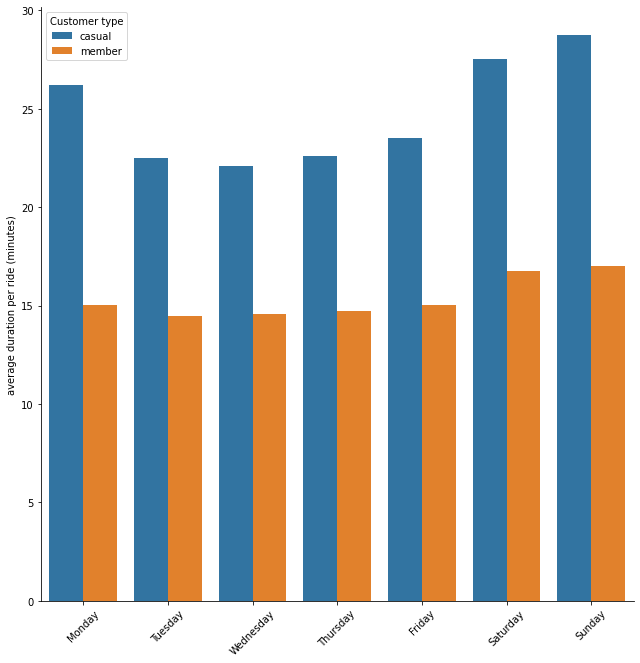

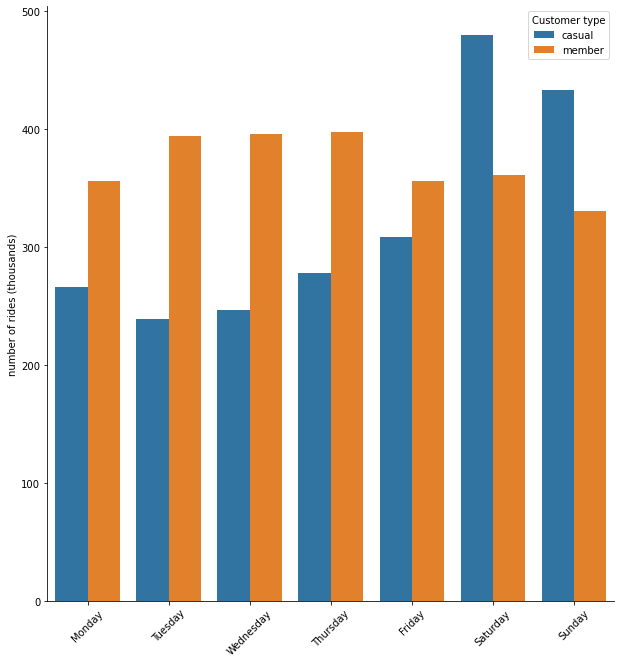

In [119]:
sns.catplot(kind = "bar", x = 'started_at', data = weekday, y = 'duration', hue = 'member_casual', legend=False, height=9)
axis_label(y = DURATION_AXIS_LABEL)
plt.xticks(rotation=45)
plt.legend(title = "Customer type")

sns.catplot(kind = "bar", x = 'started_at', data = weekday, y = 'total', hue = 'member_casual', legend=False, height=9)
axis_label(y = TOTAL_AXIS_LABEL)
plt.xticks(rotation=45)
plt.legend(title = "Customer type")

current_values = plt.gca().get_yticks()/1000
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

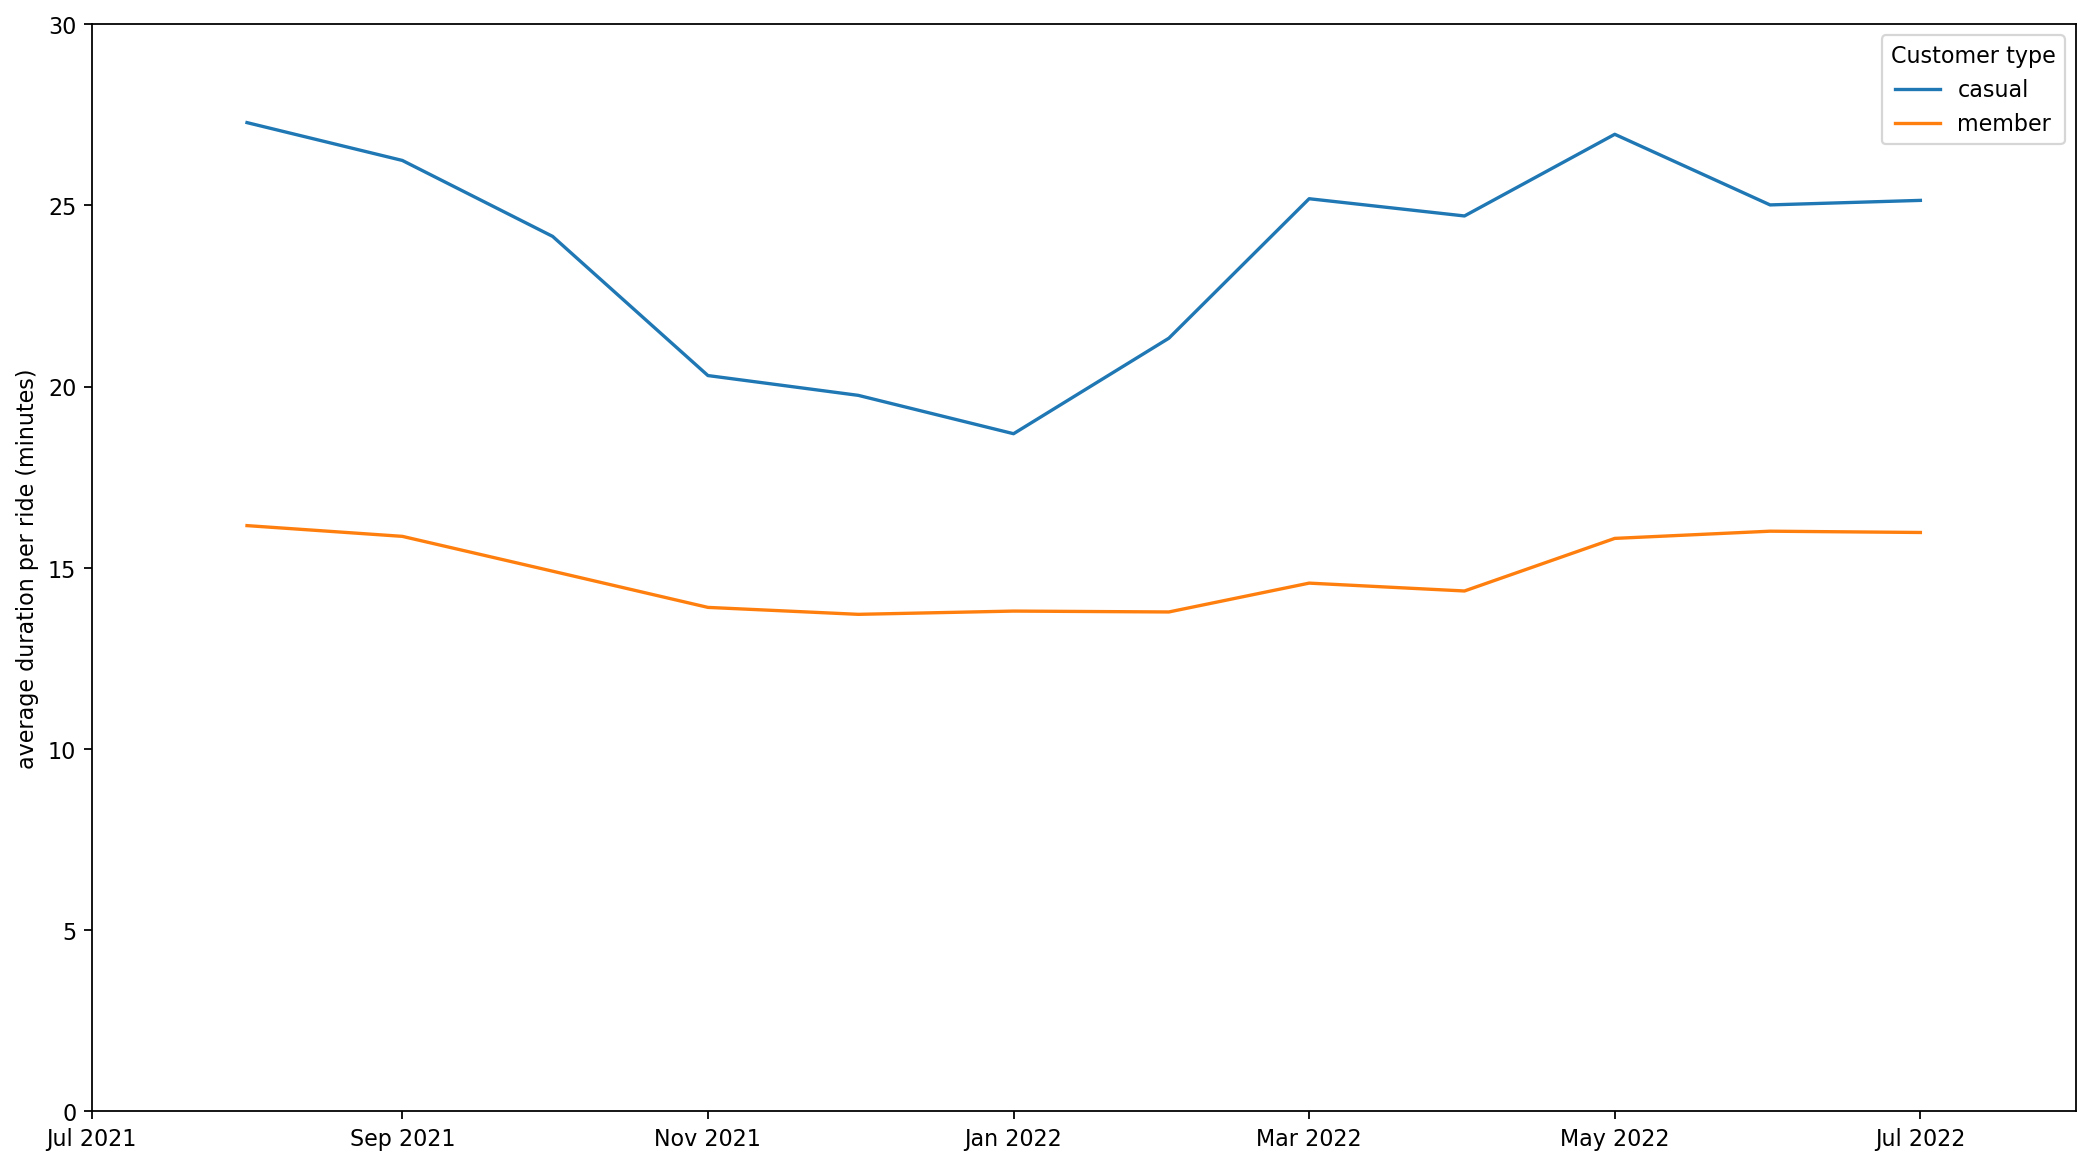

In [108]:
date_form = DateFormatter("%b %Y")
fig, ax = plt.subplots(figsize=(16, 9), dpi = 160)

sns.lineplot(data = monthly, x = 'started_at', y = 'duration', hue = 'member_casual')
plt.ylim(0,30,5)
axis_label(y = DURATION_AXIS_LABEL)
plt.legend(title = "Customer type")
ax.set_xlim([datetime.date(2021, 7, 1), datetime.date(2022, 8, 1)])
ax.xaxis.set_major_formatter(date_form)


C:\Users\Hush\AppData\Local\Temp\ipykernel_3668\3991660221.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


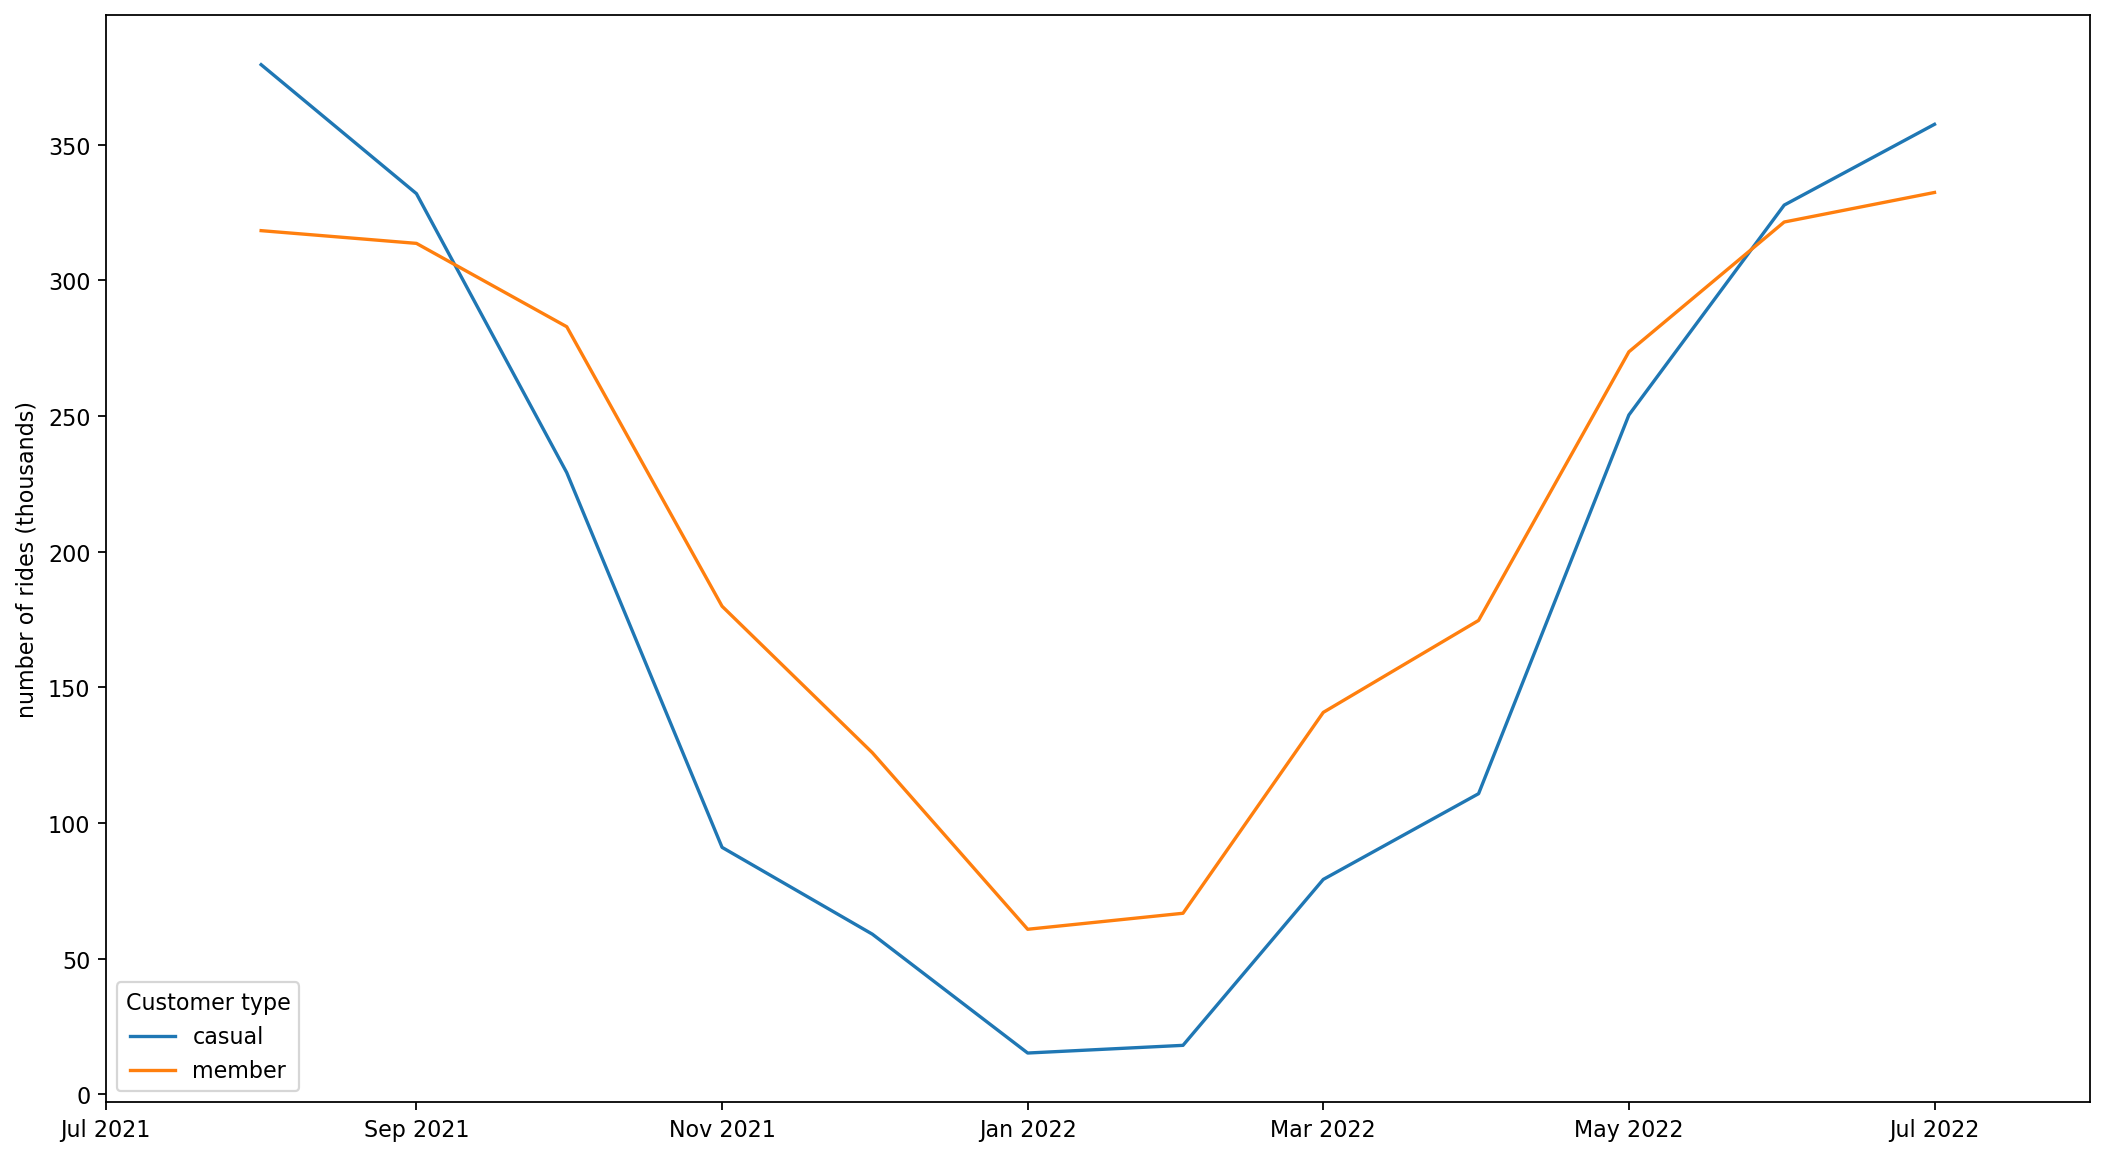

In [109]:
fig, ax = plt.subplots(figsize=(16, 9), dpi = 160)

sns.lineplot(data = monthly, x = 'started_at', y = 'total', hue = 'member_casual')
axis_label(y = TOTAL_AXIS_LABEL)

current_values = plt.gca().get_yticks()/1000
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.legend(title = "Customer type")
ax.set_xlim([datetime.date(2021, 7, 1), datetime.date(2022, 8, 1)])
ax.xaxis.set_major_formatter(date_form)